In [1]:
# Import KmdPlus module.
import matplotlib.pyplot as plt
import numpy as np

# Import libraries.
import pandas as pd
from sklearn.decomposition import PCA

from foundation_model.utils.kmd_plus import (
    KMD,
    StatsDescriptor,
    element_features,  # Element-level descriptors of shape (94, 58).
    formula_to_composition,
)

# Load the dataset for the KmdPlus tutorial.
# Chemical formulas of all stable materials listed in Materials Project (2022/08/07), and their formation energies.
MP_stable = pd.read_pickle("../data/qc_ac_te_mp_dos_reformat_20250529.pd.xz")

2025-06-03 03:02:46.929 | INFO     | __init__:<module>:34 - Loguru logger initialized for foundation_model package.


In [2]:
# Convert chemical formulas to compositions.
MP_weight = MP_stable.composition.apply(formula_to_composition)
MP_weight = np.stack(MP_weight.values)
component_features = element_features

print(MP_weight.shape)
print(component_features.shape)

(56401, 94)
(94, 58)


In [3]:
# Generate the kernel mean descriptors (KMD) for each feature, then combine them.
kmd_1d = KMD("1d")  # Unidimensional KMD; the kernel mean is discretized at the n_grids equally spaced grids

# Generate 2 types of descriptors with the default settings (materials → descriptors).
kmd1d = kmd_1d.transform(MP_weight, component_features, 10)

# Add index to the KMD DataFrame.
kmd1d_desc = pd.DataFrame(kmd1d, index=MP_stable.index)

# Save the KMD descriptors to a file.
# kmd1d_desc.to_pickle("../data/qc_ac_te_mp_dos_kmd1d_desc_20250529.pd.xz")

/data/foundation_model/src/foundation_model/utils/kmd_plus.py:160: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  grid_points = np.linspace(min_cf[i], max_cf[i], n_grids)


In [4]:
kmd1d_desc

0         1         2         3             4    \
id                                                                    
mp-111         0.468329  0.983489  0.279511  0.010751  5.596171e-05   
mp-23158       0.990678  0.442278  0.026722  0.000219  2.417959e-07   
mp-23155       0.066766  0.659527  0.881694  0.159520  3.905907e-03   
mp-1525632     0.549154  0.950290  0.222550  0.007054  3.025566e-05   
mp-1095223     0.576763  0.933917  0.206337  0.006216  2.552183e-05   
...                 ...       ...       ...       ...           ...   
starry-193435  0.003263  0.108069  0.529154  0.382128  4.019768e-02   
starry-193434  0.003280  0.108661  0.530673  0.380657  3.955965e-02   
starry-193433  0.003298  0.109253  0.532192  0.379187  3.892162e-02   
starry-78234   0.241771  0.456591  0.220608  0.024015  6.294859e-02   
starry-65766   0.037989  0.238675  0.205235  0.062888  3.176432e-01   

                        5             6             7             8    \
id                                                                      
mp-111         3.942336e-08  3.758610e-12  4.849668e-17  8.468524e-23   
mp-23158       3.621226e-11  7.339616e-16  2.013270e-21  7.473807e-28   
mp-23155       1.294316e-05  5.804571e-09  3.522985e-13  2.893760e-18   
mp-1525632     1.756355e-08  1.379841e-12  1.467090e-17  2.111035e-23   
mp-1095223     1.426889e-08  1.085614e-12  1.123253e-17  1.579515e-23   
...                     ...           ...           ...           ...   
starry-193435  6.066525e-04  1.297681e-06  3.907716e-10  1.652872e-14   
starry-193434  5.859486e-04  1.220582e-06  3.547071e-10  1.433565e-14   
starry-193433  5.652446e-04  1.143482e-06  3.186425e-10  1.214257e-14   
starry-78234   1.816297e-01  7.127052e-02  3.784822e-03  2.720145e-05   
starry-65766   3.495007e-01  5.210586e-02  1.051325e-03  2.870772e-06   

                        9    ...       570       571       572       573  \
id                           ...                                           
mp-111         2.001311e-29  ...  0.999173  0.389343  0.020532  0.000147   
mp-23158       3.754851e-35  ...  1.000000  0.367879  0.018316  0.000123   
mp-23155       3.216809e-24  ...  0.953478  0.542747  0.041811  0.000436   
mp-1525632     4.110978e-30  ...  0.997143  0.408249  0.022621  0.000170   
mp-1095223     3.016913e-30  ...  0.995362  0.417986  0.023785  0.000183   
...                     ...  ...       ...       ...       ...       ...   
starry-193435  9.825001e-20  ...  0.094309  0.474298  0.418214  0.071590   
starry-193434  8.062462e-20  ...  0.092767  0.473713  0.420178  0.071865   
starry-193433  6.299923e-20  ...  0.091225  0.473128  0.422142  0.072141   
starry-78234   2.645755e-08  ...  0.579171  0.517881  0.078354  0.001918   
starry-65766   1.060893e-09  ...  0.365828  0.634556  0.211919  0.011480   

                        574           575           576           577  \
id                                                                      
mp-111         1.415384e-07  1.850164e-11  3.273086e-16  7.836380e-22   
mp-23158       1.125352e-07  1.388794e-11  2.319523e-16  5.242886e-22   
mp-23155       6.150670e-07  1.174500e-10  3.035250e-15  1.061566e-20   
mp-1525632     1.721457e-07  2.364333e-11  4.394727e-16  1.105519e-21   
mp-1095223     1.916446e-07  2.713781e-11  5.207753e-16  1.354346e-21   
...                     ...           ...           ...           ...   
starry-193435  2.190520e-03  1.031926e-05  6.881270e-09  6.297550e-13   
starry-193434  2.194338e-03  1.032567e-05  6.882652e-09  6.297942e-13   
starry-193433  2.198156e-03  1.033207e-05  6.884033e-09  6.298334e-13   
starry-78234   7.134662e-06  3.846173e-09  2.916544e-13  3.059022e-18   
starry-65766   8.968884e-05  9.666594e-08  1.417827e-11  2.818876e-16   

                        578           579  
id                                         
mp-111         2.539128e-28  1.113435e-35  
mp-23158       1.603811e-28  6.639677e-36  
mp-23155       5.024706e-27  3.

In [ ]:
# Generate the kernel mean descriptors (KMD) for each feature, then combine them.
kmd_1d = KMD("1d")  # Unidimensional KMD; the kernel mean is discretized at the n_grids equally spaced grids
# between a maximum and minimum values for each feature.

# Generate 2 types of descriptors with the default settings (materials → descriptors).
kmd1d = kmd_1d.transform(MP_weight, component_features, 10)
ssd = StatsDescriptor(MP_weight, component_features)

# Scaling the summary statistics descriptors (SSD).
ssd_scaled = (ssd - ssd.mean(axis=0)) / ssd.std(axis=0, ddof=1)
formation_energy = np.array(MP_stable["formation_energy_per_atom"])

print(kmd1d.shape)
print(ssd_scaled.shape)

(35463, 580)
(35463, 232)


In [5]:
# Inverse-translate the KMD into the weights of the components (descriptors → materials).
decoded_weight = kmd_1d.inverse_transform(kmd1d)

# Compute the reconstruction error between the weights used to generate the KMD and the decoded weights.
MAE = np.mean((abs(MP_weight - decoded_weight)).sum(1))
print(f"Reconstructuion error (MAE) is {MAE}.")
print("The weights used to generate the KMD were successfully reconstructed except for numerical errors.")

Reconstructuion error (MAE) is 3.8966397731785307e-13.
The weights used to generate the KMD were successfully reconstructed except for numerical errors.


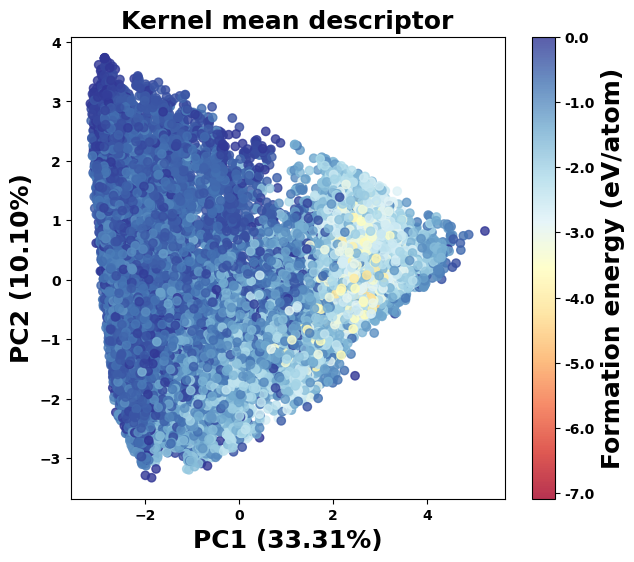

In [ ]:
# PCA visualization of the KMD.

pca = PCA()
x = kmd1d
pca.fit(x)
feature = pca.transform(x)

cm = plt.colormaps.get_cmap("RdYlBu")
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(1, 1, 1)
mappable = ax.scatter(feature[:, 0], feature[:, 1], c=formation_energy, cmap=cm, alpha=0.8)
cb = fig.colorbar(mappable, ax=ax)
cb.set_ticks(cb.ax.get_yticks()[1:])  # delete -8.0.
cb.ax.set_yticklabels(labels=cb.ax.get_yticks(), fontsize=10, weight="bold")
cb.set_label("Formation energy (eV/atom)", size=18, fontweight="bold")
plt.title("Kernel mean descriptor", fontsize=18, fontweight="bold")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0] * 100:.2f}%)", fontsize=18, fontweight="bold")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1] * 100:.2f}%)", fontsize=18, fontweight="bold")
plt.xticks(fontsize=10, fontweight="bold")
plt.yticks(fontsize=10, fontweight="bold")
plt.show()

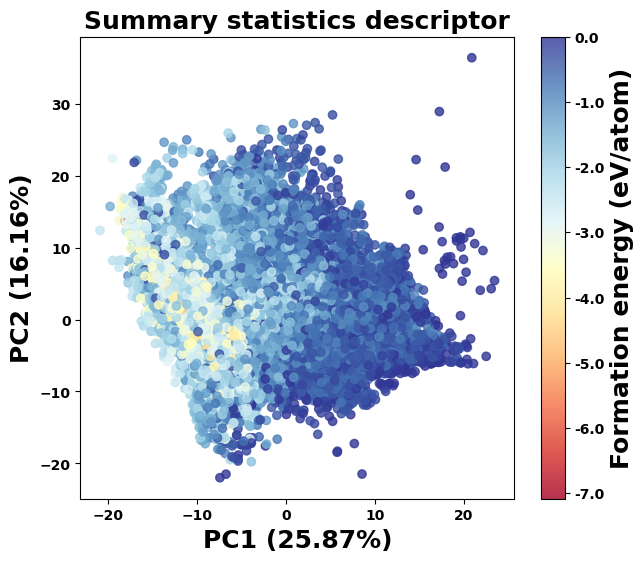

In [ ]:
# PCA visualization of the SumarryStats descriptor ("mean", "var", "max", "min").

pca = PCA()
x = ssd_scaled
pca.fit(x)
feature = pca.transform(x)

cm = plt.colormaps.get_cmap("RdYlBu")
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(1, 1, 1)
mappable = ax.scatter(feature[:, 0], feature[:, 1], c=formation_energy, cmap=cm, alpha=0.8)
cb = fig.colorbar(mappable, ax=ax)
cb.set_ticks(cb.ax.get_yticks()[1:])
cb.ax.set_yticklabels(labels=cb.ax.get_yticks(), fontsize=10, weight="bold")
cb.set_label("Formation energy (eV/atom)", size=18, fontweight="bold")
plt.title("Summary statistics descriptor", fontsize=18, fontweight="bold")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0] * 100:.2f}%)", fontsize=18, fontweight="bold")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1] * 100:.2f}%)", fontsize=18, fontweight="bold")
plt.xticks(fontsize=10, fontweight="bold")
plt.yticks(fontsize=10, fontweight="bold")
plt.show()